In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('townhall_data.csv')
df['CommentDateTime'] = pd.to_datetime(df['CommentDateTime'])
df.sample(10)

,CommenterName,CommentTitle,Comment,CommentID,CommentDateTime,CommentLink
21999,Anonymous,I strongly support this policy.,I am a parent and a grandparent. I expect the...,151093.0,2022-09-27 20:35:00,https://townhall.virginia.gov/ViewComments.cfm...
10155,Austin Nuckols,Strongly Oppose,Institutionalized cruelty,139142.0,2022-09-26 18:59:00,https://townhall.virginia.gov/ViewComments.cfm...
31746,Mom of 10th and 8th grade girls,Oppose- If you don't know/respect your child's...,If parents do not know/respect their child's p...,160868.0,2022-09-28 14:14:00,https://townhall.virginia.gov/ViewComments.cfm...
36158,Anonymous,Strongly Oppose,"This will hurt kids. Don't be mean, Youngkin!",165297.0,2022-09-28 20:06:00,https://townhall.virginia.gov/ViewComments.cfm...
11885,Kari Miers,Strongly oppose.,Strongly oppose.,140879.0,2022-09-26 20:27:00,https://townhall.virginia.gov/ViewComments.cfm...
48354,Anonymous,Strongly Oppose,"This will hurt kids. Don't be mean, Youngkin!",177500.0,2022-09-28 20:30:00,https://townhall.virginia.gov/ViewComments.cfm...
22218,Anonymous,Opposed!!!,Strongly Opposed! The moment you removed a per...,151313.0,2022-09-27 20:54:00,https://townhall.virginia.gov/ViewComments.cfm...
8148,Ms secret,Never!,"Don’t make the decision for the kids, they hav...",137121.0,2022-09-26 17:11:00,https://townhall.virginia.gov/ViewComments.cfm...
48959,Anonymous,Leave Trans Kids Alone,"This will hurt kids. Don't be mean, Youngkin!",178106.0,2022-09-28 20:42:00,https://townhall.virginia.gov/ViewComments.cfm...
10406,Gisel Colas,I oppose this in the strongest possible manor.,I oppose this in the strongest possible manor.,139393.0,2022-09-26 19:12:00,https://townhall.virginia.gov/ViewComments.cfm...


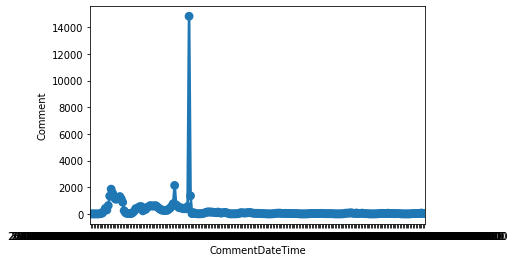

In [4]:
df_to_plot = df.groupby(pd.Grouper(key='CommentDateTime', freq='1H')).count().reset_index()
sns.pointplot(data=df_to_plot, x='CommentDateTime', y='Comment')
a = df_to_plot.loc[df_to_plot['Comment'] != df_to_plot['Comment'].max()]

<AxesSubplot:xlabel='CommentDateTime', ylabel='Comment'>

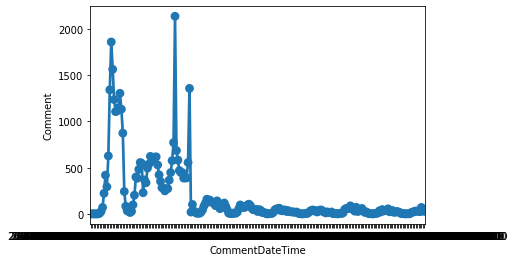

In [5]:
sns.pointplot(data=a, x='CommentDateTime', y='Comment')

In [43]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)



img = WordCloud(stopwords=stopwords).generate(' '.join(df['CommentTitle'].apply(str))).to_image()
img.save('wordcloud_titles.png')

In [13]:
from wordcloud import WordCloud, STOPWORDS
from pandas.tseries.offsets import Day

word_cloud_df=df.copy()
word_cloud_df['CommentDateTime'] = df['CommentDateTime'].apply(lambda x: x.replace(minute=0, second=0))

def generate_many_wordclouds(df, stopwords=set(STOPWORDS), start_time=None):
    if start_time is None:
        for i in df['CommentDateTime'].unique():
            try:
                img = WordCloud(stopwords=stopwords).generate(' '.join(df['Comment'].apply(str))).to_image()
                img.save('wordcloud_comments_{}.png'.format(i))
            except ValueError as e:
                print(e)
    


generate_many_wordclouds(word_cloud_df)


